In [1]:
import numpy as np
import scipy.io

import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

HARTREE_TO_KCALMOL = 627.509
EV_TO_KCALMOL = 23.0609

In [2]:
raw_data = scipy.io.loadmat(f'data/delta_emle_total.mat', squeeze_me=True)
data = {k: v for k, v in raw_data.items() if hasattr(v, 'shape')}

In [3]:
E_vac_dft = data['E_vac_dft'] - np.min(data['E_vac_dft'])
E_vac_ani = data['E_vac_ani'] - np.mean(data['E_vac_ani']-E_vac_dft)
E_vac_adp = (data['E_vac_adp'] * EV_TO_KCALMOL  - 
             np.mean(data['E_vac_adp'] * EV_TO_KCALMOL-E_vac_dft))
E_vac_dft = E_vac_dft.flatten()
E_vac_ani = E_vac_ani.flatten()
E_vac_adp = E_vac_adp.flatten()

err_ani = E_vac_ani - E_vac_dft
err_adp = E_vac_adp - E_vac_dft

kde_ani = gaussian_kde(err_ani)
kde_adp = gaussian_kde(err_adp)

In [4]:
E_static_dft = data['E_static_dft'].flatten()
E_static_emle = data['E_static_emle'].flatten()
E_induced_dft = data['E_induced_dft'].flatten()
E_induced_emle = data['E_induced_emle'].flatten()

E_emb_dft = E_static_dft + E_induced_dft
E_emb_emle = E_static_emle + E_induced_emle

E_emb_dft -= np.mean(E_emb_dft)
E_emb_emle -= np.mean(E_emb_emle)

err_emle = E_emb_emle - E_emb_dft
kde_emle = gaussian_kde(err_emle)

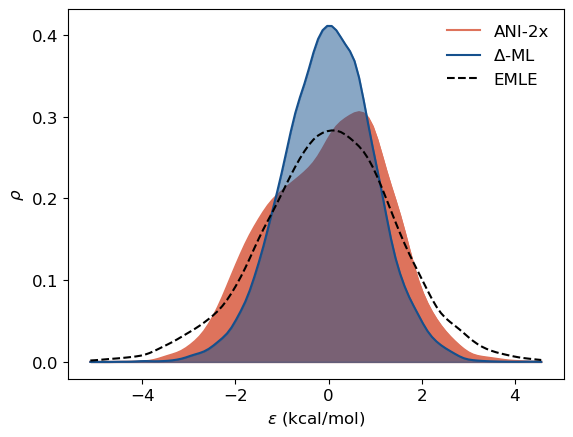

In [5]:
BLUE = "#15508d"
RED = "#de735c"

plt.rc('figure', facecolor='w')
plt.rc('font', size=12)

fig, ax = plt.subplots()
x = np.linspace(min(err_ani), max(err_ani), 100)
ax.plot(x, kde_ani(x), c=RED, zorder=-2, label='ANI-2x')
ax.fill_between(x, kde_ani(x), color=RED, zorder=-2)
ax.plot(x, kde_adp(x), c=BLUE, zorder=-2, label='$\Delta$-ML')
ax.fill_between(x, kde_adp(x), color=BLUE, zorder=-2, alpha=0.5)
ax.plot(x, kde_emle(x), c='black', linestyle='dashed', zorder=0, label='EMLE')
ax.set_xlabel('$\\epsilon$ (kcal/mol)')
ax.set_ylabel('$\\rho$')
ax.legend(frameon=False)
plt.savefig('FigS2.png', dpi=300, bbox_inches='tight')